In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df  = pd.read_csv('Dataset/heart.csv')

In [5]:
# **Handle Missing Values (if 0s are considered missing)**
# For simplicity, we'll impute 0 Cholesterol and RestingBP with the median
# (More sophisticated imputation methods could be explored later if needed)
median_cholesterol = df[df['Cholesterol'] != 0]['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

median_restingbp = df[df['RestingBP'] != 0]['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].replace(0, median_restingbp)

In [6]:
# **One-Hot Encode Categorical Features**
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [7]:
# **Feature Scaling for Numerical Features**
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [9]:
df.head(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.415002,0.858035,-0.551341,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.527329,-1.184227,-0.551341,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.141161,0.745617,-0.551341,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.303769,-0.547191,-0.551341,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.971166,-0.903182,-0.551341,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True
5,-1.539213,-0.697325,1.794852,-0.551341,1.304332,-0.832432,0,True,False,True,False,True,False,False,False,True
6,-0.902775,-0.141161,-0.116255,-0.551341,1.304332,-0.832432,0,False,True,False,False,True,False,False,False,True
7,0.051881,-1.253488,-0.659609,-0.551341,0.203982,-0.832432,0,True,True,False,False,True,False,False,False,True
8,-1.751359,0.415002,-0.678345,-0.551341,-0.267596,0.574711,1,True,False,False,False,True,False,True,True,False
9,-0.584556,-0.697325,0.764353,-0.551341,-0.660578,-0.832432,0,False,True,False,False,True,False,False,False,True


In [10]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (734, 15)
Shape of X_test: (184, 15)
Shape of y_train: (734,)
Shape of y_test: (184,)


In [11]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for potential convergence
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
y_pred_logreg = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

--- Logistic Regression Model Evaluation ---
Accuracy: 0.8804347826086957

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Confusion Matrix:



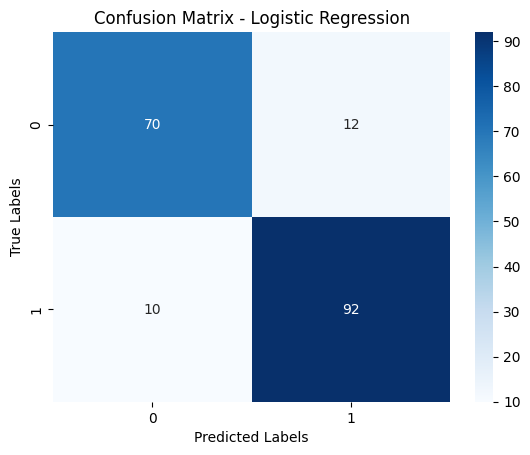


AUC-ROC Score: 0.9320899091343854


In [13]:
print("--- Logistic Regression Model Evaluation ---")

print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n")
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nAUC-ROC Score:", roc_auc_score(y_test, y_prob_logreg))